# Exploring the German-Korean Tatoeba dataset
[Github](https://github.com/Helsinki-NLP/Tatoeba-Challenge)

[Huggingface](https://huggingface.co/datasets/Helsinki-NLP/tatoeba_mt)

In [53]:
from tatoeba import preprocess, analysis
from rude_nmt import label_german, label_korean
import re
import os
import pandas as pd
from datasets import load_from_disk
import spacy
import matplotlib.pyplot as plt
import numpy as np
import sacrebleu

In [27]:
nlp = spacy.load("ko_core_news_lg", disable=["lemmatizer"])
print(spacy.explain("ADJ"))

adjective


In [ ]:
subtitle_data = preprocess.get_subtitle_dataset(force_renew=False)

In [2]:
subtitle_data = load_from_disk("../data/tatoeba_labelled")

In [3]:
len(subtitle_data)
print(subtitle_data)


Dataset({
    features: ['id', 'source', 'target', 'upos_tags_source', 'pos_tags_source', 'ws_tokens_source', 'sent_ids_source', 'de_formality', 'upos_tags_target', 'pos_tags_target', 'ws_tokens_target', 'sent_ids_target', 'ko_formality'],
    num_rows: 996350
})


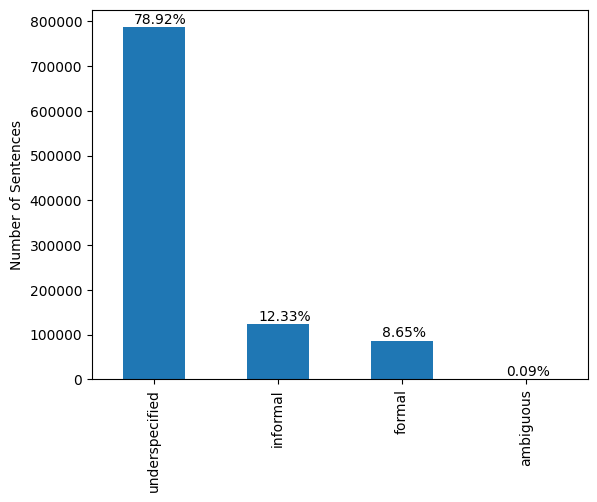

In [4]:
analysis.get_formality_plot(subtitle_data, "de_formality")

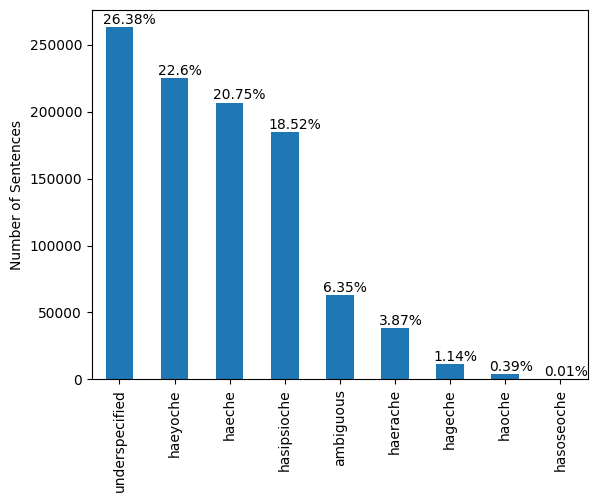

In [5]:
analysis.get_formality_plot(subtitle_data, "ko_formality", ax_annotate_vals=(0.3,2500))

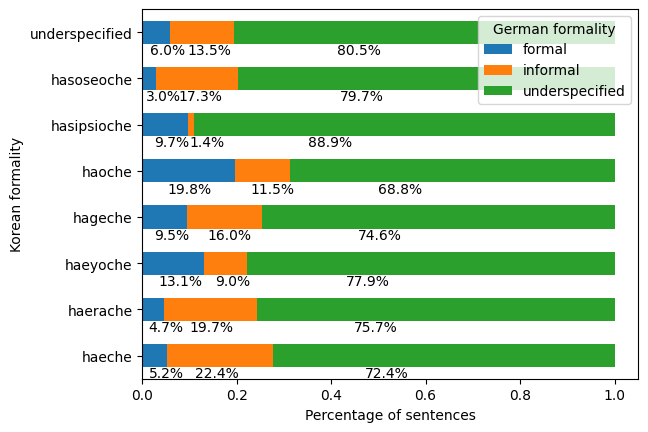

In [6]:
analysis.get_cross_formality_plot(subtitle_data, "ko_formality", "de_formality", exclude_vals=["ambiguous"], form_col_desc="Korean formality", cross_col_desc="German formality")

In [54]:
trans_data = load_from_disk("../data/tatoeba_ko_de_translated")

In [55]:
trans_data.column_names

['id', 'source', 'target', 'de_nmt', 'chrf', 'bleu', 'comet']

In [ ]:
long_data = subtitle_data.filter(lambda ex: len(ex["de_ws_tokens"]) > 100 or len(ex["ko_ws_tokens"]) > 100, num_proc=os.cpu_count())

In [46]:
from sacrebleu.metrics import CHRF, BLEU
chrf = CHRF()
bleu = BLEU(effective_order=True)
score = chrf.sentence_score(trans_data[0]["source"], [trans_data[0]["de_nmt"]])
print(score)

chrF2 = 24.37


In [43]:
def get_chrf_score(example):
    score = chrf.sentence_score(example["de_nmt"], [example["source"]])
    example["chrf"] = round(score.score,2)
    return example

In [47]:
def get_bleu_score(example):
    score = bleu.sentence_score(example["de_nmt"], [example["source"]])
    example["bleu"] = round(score.score,2)
    return example

In [48]:
trans_data = trans_data.map(get_chrf_score)
trans_data = trans_data.map(get_bleu_score)

Map:   0%|          | 0/64 [00:00<?, ? examples/s]

Map:   0%|          | 0/64 [00:00<?, ? examples/s]

In [35]:
print(trans_data["chrf"])

[19.63, 24.5, 4.76, 5.05, 24.36, 35.88, 42.84, 4.57, 11.8, 6.0, 8.47, 17.76, 11.32, 15.21, 29.63, 31.88, 61.28, 16.75, 20.65, 16.77, 6.06, 15.96, 1.54, 54.13, 8.73, 28.01, 22.68, 9.96, 1.97, 21.38, 17.04, 29.88, 23.44, 3.01, 31.19, 6.95, 11.18, 16.06, 46.64, 29.38, 13.25, 21.49, 9.27, 56.53, 45.6, 12.31, 22.13, 39.02, 43.43, 12.57, 16.48, 35.27, 8.53, 12.79, 40.77, 11.35, 17.03, 0.93, 3.04, 17.09, 11.95, 19.07, 14.8, 21.83]


In [56]:
trans_df = trans_data.to_pandas()
trans_df.to_csv("translation.csv")

In [51]:
trans_df.head(50)

,id,source,target,de_nmt,chrf,bleu
0,OpenSubtitles-v2018\tdeu\tkor_Hang,Weil ... du sie sehr geliebt hast und sie dir ...,당신이... 할머닐 너무 사랑하고 그리워했기 때문에요?,"Du... Du hast so liebt und liebt, Herrn?",19.63,11.72
1,OpenSubtitles-v2018\tdeu\tkor_Hang,"Carol, hier ist Vincent. Sag nichts. Hör bloß zu.","캐럴, 나야 빈센트 말하지 말고 들어","Carol, don't say ""Naya Vincent""!",24.50,6.77
2,OpenSubtitles-v2018\tdeu\tkor_Hang,Yay! Yay!,만번째세요!,10!,4.76,18.39
3,OpenSubtitles-v2018\tdeu\tkor_Hang,Sie müssen mir helfen. Ich brauche Ihre Hilfe....,나도 그러고는 싶네만..,Ich will.,5.05,1.24
4,OpenSubtitles-v2018\tdeu\tkor_Hang,"Wir müssen herausfinden, wo die Tests sind.",어디로 가려는 거야? 시험 결과를 보관해 놓은 곳을 찾아야 해,Wo sollen wir hinten? Wo sollen wir die Tester...,24.36,3.39
5,OpenSubtitles-v2018\tdeu\tkor_Hang,"Denken Sie, wir können ihr helfen?",우리가 도울 수 있을까요?,Können wir helfen?,35.88,13.01
6,OpenSubtitles-v2018\tdeu\tkor_Hang,Du bist nicht alleine. Dieser Raum ist zum Beten.,가자 아가야 넌 혼자가 아냐,"""Come, baby. Du bist nicht allein.""",42.84,15.85
7,OpenSubtitles-v2018\tdeu\tkor_Hang,Was hast du gekauft? Einen Haufen Zeug.,웰빙 마트로 갔어?,Mittag? Mittag?,4.57,4.58
8,OpenSubtitles-v2018\tdeu\tkor_Hang,"Ich weiß, du hast gesagt, dass du dich nicht e...",니가 불안해하는 게 아니라고 했었지,"Sie said, ""Du bist nicht nervös.""",11.80,3.03
9,OpenSubtitles-v2018\tdeu\tkor_Hang,"""und führst ein anständiges Leben...",이제껏 그랬던 것처럼,Undoubtedly.,6.00,1.51


In [5]:
dat = subtitle_data.to_pandas()

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996350 entries, 0 to 996349
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                996350 non-null  object
 1   source            996350 non-null  object
 2   target            996350 non-null  object
 3   upos_tags_source  996350 non-null  object
 4   pos_tags_source   996350 non-null  object
 5   ws_tokens_source  996350 non-null  object
 6   sent_ids_source   996350 non-null  object
 7   de_formality      996350 non-null  object
 8   upos_tags_target  996350 non-null  object
 9   pos_tags_target   996350 non-null  object
 10  ws_tokens_target  996350 non-null  object
 11  sent_ids_target   996350 non-null  object
 12  ko_formality      996350 non-null  object
dtypes: object(13)
memory usage: 98.8+ MB


In [19]:
dat["de_formality"].value_counts()

underspecified    786347
informal          122849
formal             86226
ambiguous            928
Name: de_formality, dtype: int64

In [9]:
pd.set_option('display.max_rows', 500)

In [10]:
print(len(dat.index))

996350


In [9]:
dat["de_formality"].value_counts()

underspecified    786347
informal          122849
formal             86226
ambiguous            928
Name: de_formality, dtype: int64

In [10]:
dat["ko_formality"].value_counts()

underspecified    270380
hayoche           225235
haeche            198635
hasipsioche       178849
ambiguous          69535
haerache           38461
hageche            11277
haoche              3845
hasoseoche           133
Name: ko_formality, dtype: int64

In [13]:
dat.head(10)

,id,source,target,upos_tags_source,pos_tags_source,ws_tokens_source,sent_ids_source,de_formality,upos_tags_target,pos_tags_target,ws_tokens_target,sent_ids_target,ko_formality
0,OpenSubtitles-v2018\tdeu\tkor_Hang,Weil ... du sie sehr geliebt hast und sie dir ...,당신이... 할머닐 너무 사랑하고 그리워했기 때문에요?,"[SCONJ, PUNCT, PRON, PRON, ADV, VERB, AUX, CCO...","[KOUS, $(, PPER, PPER, ADV, VVPP, VAFIN, KON, ...","[Weil, ..., du, sie, sehr, geliebt, hast, und,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",informal,"[PRON, PUNCT, VERB, ADV, CCONJ, AUX, VERB, PUNCT]","[npp+jcs, sf, pvg+etm, mag, ncpa+xsv+ecc, px+e...","[당신이, ..., 할머닐, 너무, 사랑하고, 그리워했기, 때문에요, ?]","[0, 0, 0, 0, 0, 0, 0, 0]",underspecified
1,OpenSubtitles-v2018\tdeu\tkor_Hang,"Carol, hier ist Vincent. Sag nichts. Hör bloß zu.","캐럴, 나야 빈센트 말하지 말고 들어","[PROPN, PUNCT, ADV, AUX, PROPN, PUNCT, VERB, P...","[NE, $,, ADV, VAFIN, NE, $., VVIMP, PIS, $., V...","[Carol, ,, hier, ist, Vincent, ., Sag, nichts,...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2]",underspecified,"[NOUN, PUNCT, ADV, PROPN, VERB, CCONJ, SCONJ]","[ncn, sp, npp+jca, nq, pvg+ecx, px+ecc, pvg+ecs]","[캐럴, ,, 나야, 빈센트, 말하지, 말고, 들어]","[0, 0, 0, 0, 0, 0, 0]",haeche
2,OpenSubtitles-v2018\tdeu\tkor_Hang,Yay! Yay!,만번째세요!,"[PROPN, PUNCT, PROPN, PUNCT]","[NE, $., NE, $.]","[Yay, !, Yay, !]","[0, 0, 1, 1]",underspecified,"[VERB, PUNCT]","[ncn+jp+ef, sf]","[만번째세요, !]","[0, 0]",underspecified
3,OpenSubtitles-v2018\tdeu\tkor_Hang,Sie müssen mir helfen. Ich brauche Ihre Hilfe....,나도 그러고는 싶네만..,"[PRON, AUX, PRON, VERB, PUNCT, PRON, VERB, DET...","[PPER, VMFIN, PPER, VVINF, $., PPER, VVFIN, PP...","[Sie, müssen, mir, helfen, ., Ich, brauche, Ih...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3, 3]",formal,"[ADV, NOUN, ADV, VERB]","[npp+jxc, mag+jxt, paa+etn+jxc, pvg+ef]","[나도, 그러고는, 싶네만, ..]","[0, 0, 0, 0]",underspecified
4,OpenSubtitles-v2018\tdeu\tkor_Hang,"Wir müssen herausfinden, wo die Tests sind.",어디로 가려는 거야? 시험 결과를 보관해 놓은 곳을 찾아야 해,"[PRON, AUX, VERB, PUNCT, SCONJ, DET, NOUN, AUX...","[PPER, VMFIN, VVINF, $,, PWAV, ART, NN, VAFIN,...","[Wir, müssen, herausfinden, ,, wo, die, Tests,...","[0, 0, 0, 0, 0, 0, 0, 0, 0]",underspecified,"[ADV, VERB, VERB, PUNCT, NOUN, NOUN, VERB, AUX...","[npd+jca, pvg+etm, nbn+jp+ef, sf, ncpa, ncn+jc...","[어디로, 가려는, 거야, ?, 시험, 결과를, 보관해, 놓은, 곳을, 찾아야, 해]","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]",haeche
5,OpenSubtitles-v2018\tdeu\tkor_Hang,"Denken Sie, wir können ihr helfen?",우리가 도울 수 있을까요?,"[VERB, PRON, PUNCT, PRON, AUX, PRON, VERB, PUNCT]","[VVFIN, PPER, $,, PPER, VMFIN, PPER, VVINF, $.]","[Denken, Sie, ,, wir, können, ihr, helfen, ?]","[0, 0, 0, 0, 0, 0, 0, 0]",formal,"[PRON, VERB, NOUN, VERB, PUNCT]","[npp+jcs, pvg+etm, nbn, paa+ef+jxf, sf]","[우리가, 도울, 수, 있을까요, ?]","[0, 0, 0, 0, 0]",hayoche
6,OpenSubtitles-v2018\tdeu\tkor_Hang,Du bist nicht alleine. Dieser Raum ist zum Beten.,가자 아가야 넌 혼자가 아냐,"[PRON, AUX, PART, ADV, PUNCT, DET, NOUN, AUX, ...","[PPER, VAFIN, PTKNEG, ADV, $., PDAT, NN, VAFIN...","[Du, bist, nicht, alleine, ., Dieser, Raum, is...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]",informal,"[SCONJ, ADV, PRON, NOUN, SCONJ]","[pvg+ecs, nq, npp+jxt, ncn+jcc, paa+ef]","[가자, 아가야, 넌, 혼자가, 아냐]","[0, 0, 0, 0, 0]",haerache
7,OpenSubtitles-v2018\tdeu\tkor_Hang,Was hast du gekauft? Einen Haufen Zeug.,웰빙 마트로 갔어?,"[PRON, AUX, PRON, VERB, PUNCT, DET, NOUN, NOUN...","[PWS, VAFIN, PPER, VVPP, $., ART, NN, NN, $.]","[Was, hast, du, gekauft, ?, Einen, Haufen, Zeu...","[0, 0, 0, 0, 0, 1, 1, 1, 1]",informal,"[NOUN, ADV, VERB, PUNCT]","[ncn, ncn+jca, pvg+ep+ef, sf]","[웰빙, 마트로, 갔어, ?]","[0, 0, 0, 0]",haeche
8,OpenSubtitles-v2018\tdeu\tkor_Hang,"Ich weiß, du hast gesagt, dass du dich nicht e...",니가 불안해하는 게 아니라고 했었지,"[PRON, VERB, PUNCT, PRON, AUX, VERB, PUNCT, SC...","[PPER, VVFIN, $,, PPER, VAFIN, VVPP, $,, KOUS,...","[Ich, weiß, ,, du, hast, gesagt, ,, dass, du, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",informal,"[PROPN, VERB, NOUN, VERB, SCONJ]","[nq+jcs, pvg+etm, nbn+jcc, paa+ef+jcr, pvg+ep+...","[니가, 불안해하는, 게, 아니라고, 했었지]","[0, 0, 0, 0, 

In [14]:
amb_dat = dat[dat["ko_formality"].str.match("underspecified")]

In [16]:
amb_dat[["pos_tags_target", "upos_tags_target","ws_tokens_target","target"]].head(100).to_csv("ambiguity.csv")